In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


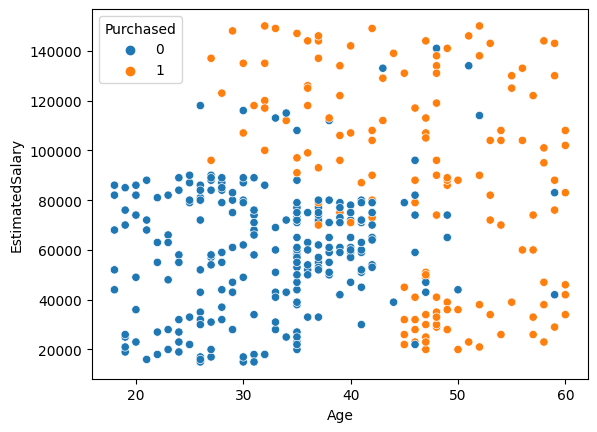

In [4]:
sns.scatterplot(x="Age",y="EstimatedSalary",hue="Purchased",data=dataset)
plt.show()

In [5]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn


KNeighborsClassifier()

In [8]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [9]:
kn.score(x_train,y_train)


0.88125

In [10]:
kn.score(x_test,y_test)

0.825

In [11]:
for i in range(1,30):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(x_train,y_train)
    print(i,kn.score(x_train,y_train)*100,kn.score(x_test,y_test)*100)

1 99.6875 81.25
2 87.8125 76.25
3 89.6875 80.0
4 86.25 80.0
5 88.125 82.5
6 85.0 77.5
7 86.25 81.25
8 85.0 77.5
9 85.0 80.0
10 83.125 77.5
11 84.375 80.0
12 82.5 77.5
13 82.8125 75.0
14 81.5625 76.25
15 82.8125 77.5
16 81.875 75.0
17 83.125 77.5
18 82.1875 76.25
19 82.8125 76.25
20 80.625 75.0
21 83.75 77.5
22 81.875 76.25
23 82.8125 76.25
24 81.5625 76.25
25 82.1875 77.5
26 83.125 77.5
27 82.8125 78.75
28 81.5625 78.75
29 81.875 78.75


In [12]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

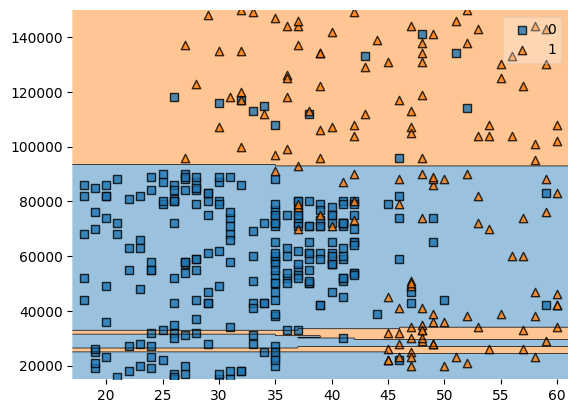

In [13]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),kn)